# Measure how the error propagate through the program is a chanllenge problem

## How to trace the error propagate through the program.

## Error in different location has different meaning how to define them under same space.

In [1]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
with open('appstate_golden.log') as f:
    golden = f.readlines()
    
#masked case
with open('appstate_17523.log') as f:
    masked_case = f.readlines()
    
#SDC case
with open('appstate_16246.log') as f:
    sdc_case = f.readlines()

## Absolute Error and Relative Error in SDC and Masked Run

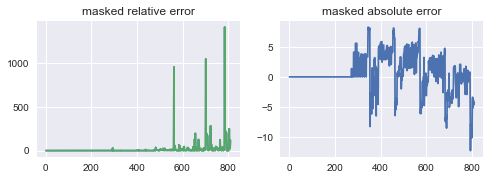

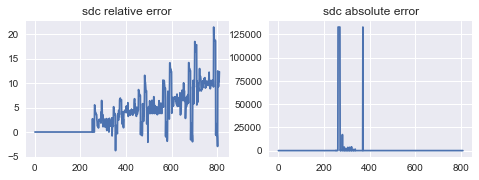

In [16]:
masked_absolute_error = []
masked_relative_error = []
sdc_absolute_error = []
sdc_relative_error = []

for i in range(len(golden)):
    g = golden[i].strip('\n\r ').split(' ')
    m = masked_case[i].strip('\n\r ').split(' ')
    s = sdc_case[i].strip('\n\r ').split(' ')
    
    
    if float(g[-1]) != float(m[-1]):
        masked_absolute_error.append(math.log(abs(float(g[-1]) - float(m[-1]))))
        sdc_absolute_error.append(math.log(abs(float(g[-1]) - float(s[-1]))))
    else:
        masked_absolute_error.append(abs(float(g[-1]) - float(m[-1])))
        sdc_absolute_error.append(abs(float(g[-1]) - float(s[-1])))
    
    if float(g[-1]) != 0:
        if (float(m[-1]) - float(g[-1])) == 0:
            masked_relative_error.append(0)
        else:
            masked_relative_error.append(abs((float(m[-1]) - float(g[-1]))/float(g[-1])))
        if (float(s[-1]) - float(g[-1]))==0:
            sdc_relative_error.append(0)
        else:
            sdc_relative_error.append(math.log(abs((float(s[-1]) - float(g[-1]))/float(g[-1]))))
    else:
        masked_relative_error.append(float(m[-1]))
        sdc_relative_error.append(float(s[-1]))

plt.subplot(221)
plt.plot(range(len(golden)), masked_relative_error)
plt.title('masked relative error')

plt.subplot(222)
plt.plot(range(len(golden)), masked_absolute_error)
plt.title('masked absolute error')
plt.show()

plt.subplot(223)
plt.plot(range(len(golden)), sdc_relative_error)
plt.title('sdc relative error')

plt.subplot(224)
plt.plot(range(len(golden)), sdc_absolute_error)
plt.title('sdc absolute error')
plt.show()

## Different Variables' Absolute Error and Relative Error in SDC and Masked Run

In [20]:
masked_absolute_error = {}
masked_relative_error = {}
sdc_absolute_error = {}
sdc_relative_error = {}



for i in range(len(golden)):
    g = golden[i].strip('\n\r ').split(' ')
    linename = g[1] + g[2]
    
    if linename not in masked_absolute_error:
        masked_absolute_error[linename] = [[0,0]]
        masked_relative_error[linename] = [[0,0]]
        sdc_absolute_error[linename] = [[0,0]]
        sdc_relative_error[linename] = [[0,0]]
    
    

for i in range(len(golden)):
    g = golden[i].strip('\n\r ').split(' ')
    m = masked_case[i].strip('\n\r ').split(' ')
    s = sdc_case[i].strip('\n\r ').split(' ')
    linename = g[1]+g[2]
    
    
    for key in masked_absolute_error.keys():
        if key != linename:
            l = len(masked_absolute_error[linename])-1 
            masked_absolute_error[linename].append([masked_absolute_error[linename][l][0], i])
            masked_relative_error[linename].append([masked_relative_error[linename][l][0], i])
            sdc_absolute_error[linename].append([sdc_absolute_error[linename][l][0], i])
            sdc_relative_error[linename].append([sdc_relative_error[linename][l][0], i])
    
    masked_absolute_error[linename].append([abs(float(g[-1]) - float(m[-1])), i])
    sdc_absolute_error[linename].append([abs(float(g[-1]) - float(s[-1])), i])
    
    if float(g[-1])!=0:
        masked_relative_error[linename].append([abs(float(g[-1])/float(m[-1])), i])
        sdc_relative_error[linename].append([abs(float(g[-1])/float(s[-1])), i])
    else:
        masked_relative_error[linename].append([float(m[-1]), i])
        sdc_relative_error[linename].append([float(s[-1]), i])

In [21]:
var_keys = masked_relative_error.keys()
#print np.array(masked_relative_error[var_keys[1]])[:,1]
print var_keys

['75rtrans', '87normr', '84beta', '25Ap', '167A', '76normr', '33r', '48sum', '57sum', '90p_ap_dot', '82oldrtrans', '83rtrans', '175b', '40y', '91alpha']


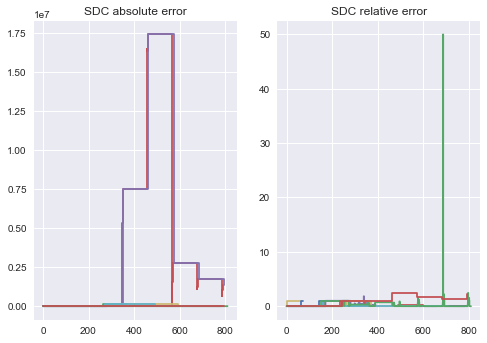

In [22]:
#var_keys[0]
'''
plt.subplot(221)
for key in var_keys:
    var = np.array(masked_absolute_error[key])
    plt.plot(var[:,1], var[:,0])
plt.title('masked absolute error')
   
plt.subplot(222)
for key in var_keys:
    var = np.array(masked_relative_error[key])
    plt.plot(var[:,1], var[:,0])
    
plt.title('masked relative error')
'''

#plt.subplot(233)
#for key in var_keys:
#    var = np.array(masked_absolute_error[key])
#    plt.plot(var[:,1], var[:,0]/(np.max(var[:,0]) - np.min(var[:,0])))
    
#plt.title('masked norm error')


plt.subplot(121)
for key in var_keys:
    var = np.array(sdc_absolute_error[key])
    plt.plot(var[:,1], var[:,0])
plt.title('SDC absolute error')


plt.subplot(122)
for key in var_keys:
    var = np.array(sdc_relative_error[key])
    plt.plot(var[:,1], var[:,0])
plt.title('SDC relative error')


#plt.subplot(236)
#for key in var_keys:
#    var = np.array(sdc_absolute_error[key])
#    plt.plot(var[:,1], var[:,0]/(np.max(var[:,0]) - np.min(var[:,0])))
    
#plt.title('SDC norm error')
plt.show()

Absolute Error $$|golden_{var} - error_{var}|$$

Relative Error  $$|\frac{golden_{var}}{error_{var}}|$$

Normalize Error $$\frac{|golden_{var} - error_{var}|}{MAXerror_{var}}$$
